In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
data=pd.read_csv('/home/tamizh3110/Downloads/cost-of-living.csv',header=0)

In [3]:
data.head(55)

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 161 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(1)
memory usage: 69.3+ KB
None


In [5]:
# drop columns with nan values
data.dropna()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [6]:
data.corr(method='pearson')

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",0.918586,0.906851,0.882891,0.880925,0.872939,0.971561,0.853151,0.855945,0.913964,0.882666,...,0.865918,0.870543,0.873427,0.980660,0.888768,1.000000,0.992545,0.993922,0.845885,0.900548
"Perth, Australia",0.950830,0.946219,0.926335,0.902077,0.914602,0.981194,0.900232,0.897968,0.947804,0.923061,...,0.909050,0.912024,0.918198,0.991161,0.917133,0.992545,1.000000,0.979461,0.892862,0.937106
"Sydney, Australia",0.907843,0.890543,0.867759,0.890961,0.859678,0.971359,0.840817,0.847781,0.895982,0.870922,...,0.854349,0.859884,0.858101,0.955988,0.890584,0.993922,0.979461,1.000000,0.833124,0.883338
"Alexandria, Egypt",0.987507,0.986314,0.993682,0.967460,0.997705,0.936092,0.996751,0.998630,0.980236,0.996993,...,0.999164,0.998584,0.997150,0.870473,0.985194,0.845885,0.892862,0.833124,1.000000,0.987073


In [7]:
data=data.T

In [8]:
data.head(55)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3
"Milan, Italy",15,60,8,5,5,2.49,1.12,1.21,1.94,2.87,...,1.27,1.46,2.25,2.45,1.99,1.27,17.75,23233.3,617.27,10761.9
"Cairo, Egypt",3.38,17.48,4.51,1.69,2.82,0.29,0.18,0.84,0.51,1.04,...,0.28,1.65,0.65,0.35,0.66,0.34,8.06,21020.3,121.15,2781.29
"Banja Luka, Bosnia And Herzegovina",3.58,22.99,3.58,1.02,1.53,1.18,0.74,0.69,0.63,1.47,...,0.55,0.85,1.05,0.94,1.06,0.64,7.43,16530,128.7,1348.77
"Baku, Azerbaijan",5.27,23.73,4.22,0.84,2.11,0.37,0.21,0.83,0.26,1.03,...,0.42,2.15,1.05,0.83,1.22,0.39,6.15,18564.6,208.84,5657.01


In [9]:
new_header=data.iloc[0]
data=data[1:]
data.columns=new_header

In [10]:
data.head()

Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [11]:
data.columns

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
      

In [12]:
data=data[['Apartment (1 bedroom) in City Centre','Average Monthly Net Salary (After Tax)']]

In [13]:
data

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"Saint Petersburg, Russia",524.45,645.94
"Istanbul, Turkey",291.55,436
"Izmir, Turkey",212.22,392.07
"Helsinki, Finland",986.93,2382.56
"Chisinau, Moldova",244.49,286.95
...,...,...
"Melbourne, Australia",1134.86,2791.96
"Perth, Australia",897.5,2493.77
"Sydney, Australia",1568.39,3018.36
"Alexandria, Egypt",142.04,163.94


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 2 columns):
Apartment (1 bedroom) in City Centre      160 non-null object
Average Monthly Net Salary (After Tax)    160 non-null object
dtypes: object(2)
memory usage: 3.8+ KB


In [15]:
data['Apartment (1 bedroom) in City Centre']=data['Apartment (1 bedroom) in City Centre'].astype('float64')
data['Average Monthly Net Salary (After Tax)']=data['Average Monthly Net Salary (After Tax)'].astype('float64')
data.describe()

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
count,160.000000,160.000000
mean,733.811250,1447.181938
std,549.634877,1257.350539
min,138.310000,163.940000
25%,330.952500,472.912500
50%,521.000000,859.610000
75%,988.742500,2373.027500
max,3131.060000,6532.210000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33dc30c10>,
      dtype=object)

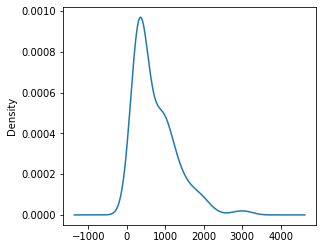

In [16]:
data['Apartment (1 bedroom) in City Centre'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33c2ad510>,
      dtype=object)

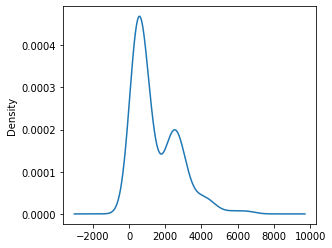

In [17]:
data['Average Monthly Net Salary (After Tax)'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))

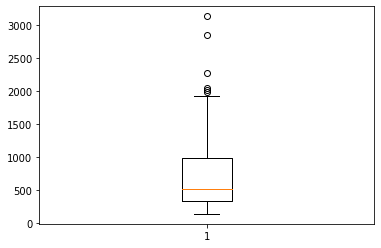

In [18]:
box_plot_apt=plt.boxplot(np.array((data['Apartment (1 bedroom) in City Centre'].values)))

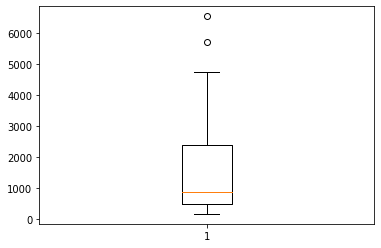

In [19]:
box_plot_sal=plt.boxplot(np.array((data['Average Monthly Net Salary (After Tax)'].values)))

In [20]:
data.sort_values(by='Average Monthly Net Salary (After Tax)',ascending=False)[0:20]

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"Zurich, Switzerland",1701.77,5714.80
"Seattle, WA, United States",1919.17,4741.65
"New York, NY, United States",2854.26,4665.46
"San Diego, CA, United States",1816.10,4293.13
"Dallas, TX, United States",1322.45,4202.00
"Boston, MA, United States",2275.95,4132.08
"Austin, TX, United States",1581.66,4097.92
"Los Angeles, CA, United States",1980.11,3968.48
"Chicago, IL, United States",1702.25,3717.02


In [21]:
data.sort_values(by='Apartment (1 bedroom) in City Centre',ascending=False)[0:20]

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"New York, NY, United States",2854.26,4665.46
"Boston, MA, United States",2275.95,4132.08
"Hong Kong, Hong Kong",2041.88,2387.66
"London, United Kingdom",2015.24,2756.93
"Los Angeles, CA, United States",1980.11,3968.48
"Seattle, WA, United States",1919.17,4741.65
"Singapore, Singapore",1859.98,2988.12
"San Diego, CA, United States",1816.10,4293.13
"Chicago, IL, United States",1702.25,3717.02


In [22]:
data['Net Salary after rent expenses']=np.array(data['Average Monthly Net Salary (After Tax)'].values)-np.array(data['Apartment (1 bedroom) in City Centre'].values)

In [23]:
data.sort_values(by=['Net Salary after rent expenses'],ascending=False)[0:20]

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
"Zurich, Switzerland",1701.77,5714.80,4013.03
"San Francisco, CA, United States",3131.06,6532.21,3401.15
"Dallas, TX, United States",1322.45,4202.00,2879.55
"Seattle, WA, United States",1919.17,4741.65,2822.48
"Austin, TX, United States",1581.66,4097.92,2516.26
"San Diego, CA, United States",1816.10,4293.13,2477.03
"Houston, TX, United States",1258.81,3568.78,2309.97
"Las Vegas, NV, United States",992.86,3132.38,2139.52
"Calgary, Canada",833.74,2956.33,2122.59
"Phoenix, AZ, United States",1092.25,3113.47,2021.22


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 3 columns):
Apartment (1 bedroom) in City Centre      160 non-null float64
Average Monthly Net Salary (After Tax)    160 non-null float64
Net Salary after rent expenses            160 non-null float64
dtypes: float64(3)
memory usage: 5.0+ KB


In [25]:
data['Net Salary after rent expenses'].describe()

count     160.000000
mean      713.370688
std       790.499620
min      -194.310000
25%       143.640000
50%       351.500000
75%      1229.287500
max      4013.030000
Name: Net Salary after rent expenses, dtype: float64

In [26]:
data.corr(method='pearson')

Unnamed: 0,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
Unnamed: 0,,,
Apartment (1 bedroom) in City Centre,1.000000,0.910265,0.752547
Average Monthly Net Salary (After Tax),0.910265,1.000000,0.957669
Net Salary after rent expenses,0.752547,0.957669,1.000000


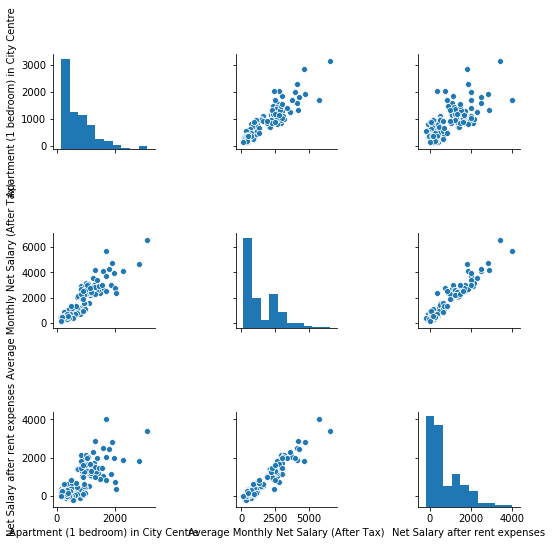

In [27]:
%config InlineBackend.figure_format = 'png'

sns.pairplot(data)

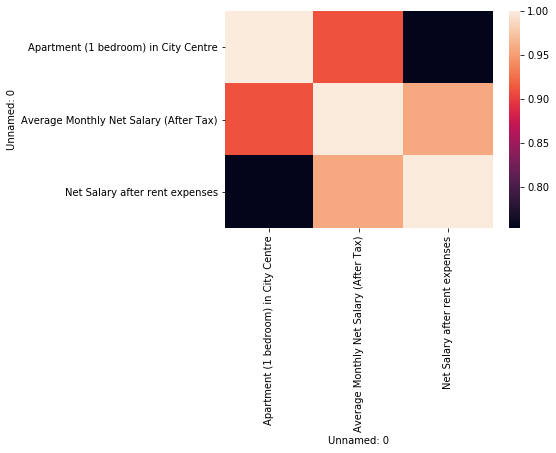

In [28]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

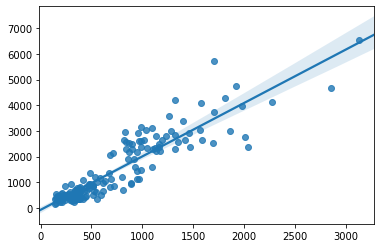

In [29]:
model=sns.regplot(data['Apartment (1 bedroom) in City Centre'].values,data['Average Monthly Net Salary (After Tax)'].values)
